In [48]:
import pandas as pd
import numpy as np

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, plot_confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

import xgboost as xgb
from xgboost import plot_importance

import string
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.simplefilter('ignore')

In [33]:
df = pd.read_csv('csv_files/job_post_dataframe.csv', index_col=0)
dummy = pd.read_csv('csv_files/dummy_lang_df.csv', index_col=0)

In [11]:
df.head()

,languages,overview,position_title,clean_description,target
1,"['amazon-web-services', 'python', 'docker', 'k...",Paige is a software company helping pathologis...,Senior Software Engineer Backend Cloud Computing,Job type Full time Experience level Senior Rol...,1
3,"['python', 'javascript', 'reactjs', 'django', ...",About UsSimon Data was founded in by a team of...,Engineering Manager,Job type Full time Experience level Senior Man...,1
4,"['node.js', 'kubernetes', 'microservices', 'ty...",Who is MANTL MANTL is a fast growing NYC based...,Senior Backend Engineer NYC Or Remote,Job type Full time Experience level Mid Level ...,0
5,"['api', 'postgresql', 'scala', 'amazon-web-ser...",As a SIMON Backend Engineer you will play an i...,Backend Engineer,Job type Full time Experience level Mid Level ...,0
6,"['go', 'ruby', 'ruby-on-rails', 'redis', 'post...",Gravity is looking for passionate software eng...,Software Engineer Backend NYC/LA,Job type Full time Experience level Junior Mid...,0


In [13]:
dummy.head()

,.net,.net-core,.netcore,3d,3dsmax,Click here,ab-testing,abap,accessibility,accommodations-ext@fb.com,...,wpf,x64,xamarin,xapi,xbox-one,xcode,xcode-ui-testing,xml,zend-framework,zos
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# appear to have been nan values, so i dropped the rows with them
df.dropna(subset=['overview'], inplace=True)

In [35]:
# specifying feature and target variables
X = df['overview']
y = df['target']

In [36]:
# creating a list of stopwords 
stopwords_list = stopwords.words('english') + list(string.punctuation)

# initalizing test-train split

In [37]:
# initializing test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
tf = TfidfVectorizer(stop_words = stopwords_list)
    
tf_idf_train = tf.fit_transform(X_train)
tf_idf_test = tf.transform(X_test)
    
# vectorizor = tf.fit(X_train)

# creating dummy classifier

In [49]:
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(tf_idf_train, y_train)

# dummy_clf.predict(tf_idf_test)

# dummy_clf.score(X, y)

DummyClassifier(strategy='most_frequent')

In [52]:
dummy_preds = dummy_clf.predict(tf_idf_test)

In [55]:
print('Dummy Classifier Accuracy Score: ',accuracy_score(y_test, dummy_preds))
print('Dummy Classifier Recall Score: ',recall_score(y_test, dummy_preds))

Dummy Classifier Accuracy Score:  0.8330019880715706
Dummy Classifier Recall Score:  0.0


# naive bays model 

In [56]:
nb_classifier = MultinomialNB()
nb_classifier.fit(tf_idf_train, y_train)
 
nb_test_preds = nb_classifier.predict(tf_idf_test)

In [58]:
print('Naive Bayes Accuracy Score: ',accuracy_score(y_test, nb_test_preds))
print('Naive Bayes Recall Score: ',f1_score(y_test, nb_test_preds))

Naive Bayes Accuracy Score:  0.8330019880715706
Naive Bayes Recall Score:  0.0


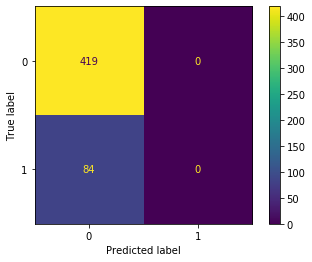

In [13]:
plot_confusion_matrix(nb_classifier, tf_idf_test, y_test)

# random forest model results

In [59]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(tf_idf_train, y_train)

rf_test_preds = rf_classifier.predict(tf_idf_test)

In [62]:
print('Random Forest Accuracy Score: ',accuracy_score(y_test, rf_test_preds))
print('Random Forest Recall Score: ',recall_score(y_test, rf_test_preds))

Random Forest Accuracy Score:  0.8648111332007953
Random Forest Recall Score:  0.25


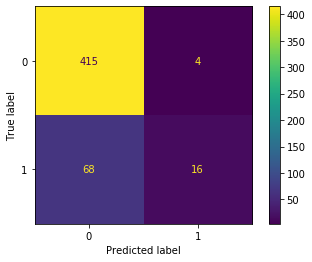

In [17]:
plot_confusion_matrix(rf_classifier, tf_idf_test, y_test)

#### feature importance of random forest models

In [102]:
# tf = TfidfVectorizer(stop_words = stopwords_list)
# # tfidf = TfidfVectorizer(stop_words = stopwords_list)
# tfidf_data_train = tf.fit_transform(X_train)
# tfidf_data_test = tfidf.transform(X_test)

In [18]:
#feature importance scores
#Decision tree algorithms like classification offer importance scores based on the reduction in the criterion used to select split points, like Gini or entropy.
feat_importanceDF_rfc_2 = pd.DataFrame(rf_classifier.feature_importances_, index=tf.vocabulary)
feat_importanceDF_rfc_2.sort_values(by=0,ascending=False).head(15)

,0
11678,0.051852
3512,0.007747
4246,0.005911
8598,0.004172
10840,0.003911
12968,0.003829
14050,0.003597
14829,0.003228
12967,0.003104
9243,0.002978


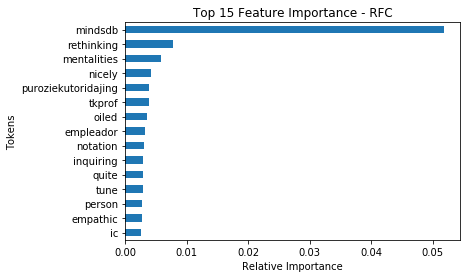

In [20]:
feat_importances_2 = pd.Series(rf_classifier.feature_importances_,index=tf.vocabulary_)
feat_importances_2.nlargest(15).sort_values().plot(kind='barh')
plt.title("Top 15 Feature Importance - RFC")
plt.xlabel('Relative Importance')
plt.ylabel('Tokens')
plt.show()

In [24]:
len(tf.vocabulary_)

16567

# XGBoost Model

In [64]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(tf_idf_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [65]:
xgb_pred = xgb_classifier.predict(tf_idf_test)

In [67]:
print('XGBoost Accuracy Score: ',accuracy_score(xgb_pred, y_test))
print('XGBoost Recall Score: ',recall_score(y_test, xgb_pred))

XGBoost Accuracy Score:  0.882703777335984
XGBoost Recall Score:  0.6309523809523809


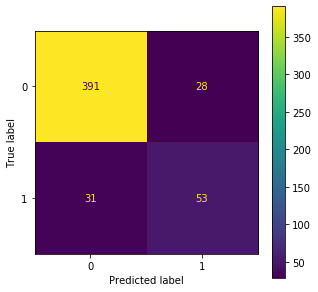

In [47]:
plot_confusion_matrix(xgb_classifier, tf_idf_test, y_test)

# setting up gridsearches for Naives Bayes, Random Forest and XGBoost

In [68]:
# creating dictionaries for gridsearch parameters
nb_param = {'alpha':[0.01, 0.05, 0.1, 1]}
rf_param = {'n_estimators':[20, 30, 40, 50], 'criterion':['gini', 'entropy'], 'max_depth':[1],
            'max_features':[1], 'max_leaf_nodes':[2], }
xgb_param = {'max_depth':[1,2,3], 'learning_rate':[0.1], 'min_child_weight':[0.1, 0.5, 1],
             'n_estimators':[200]}

In [69]:
grid_nb = GridSearchCV(nb_classifier, nb_param, n_jobs = -1, cv =5, verbose =1)

grid_nb.fit(tf_idf_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    4.4s finished


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.05, 0.1, 1]}, verbose=1)

In [70]:
grid_nb.best_params_

{'alpha': 0.1}

In [78]:
grid_nb_pred = grid_nb.best_estimator_.predict(tf_idf_test)

print('Gridsearch NB Accuracy SCore: ',accuracy_score(grid_nb_pred, y_test))

Gridsearch NB Accuracy SCore:  0.856858846918489


In [74]:
grid_rf = GridSearchCV(rf_classifier, rf_param, n_jobs = -1, cv =5, verbose=1)

grid_rf.fit(tf_idf_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  40 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.3s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [1],
                         'max_features': [1], 'max_leaf_nodes': [2],
                         'n_estimators': [20, 30, 40, 50]},
             verbose=1)

In [75]:
grid_rf.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'max_features': 1,
 'max_leaf_nodes': 2,
 'n_estimators': 20}

In [90]:
grid_rf_pred = grid_rf.best_estimator_.predict(tf_idf_test)

print('Gridsearch RF Accuracy SCore: ',accuracy_score(grid_rf_pred, y_test))

Gridsearch RF Accuracy SCore:  0.8330019880715706


In [80]:
grid_xgb = GridSearchCV(xgb_classifier, xgb_param, n_jobs= -1, cv=3, verbose=1)

grid_xgb.fit(tf_idf_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   41.9s finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
         

In [81]:
grid_xgb.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 200}

In [42]:
grid_xgb_pred = grid_xgb.best_estimator_.predict(tf_idf_test)

print('Gridsearch XGB Accuracy SCore: ',accuracy_score(grid_xgb_pred, y_test))

Gridsearch XGB Accuracy SCore:  0.8886679920477137


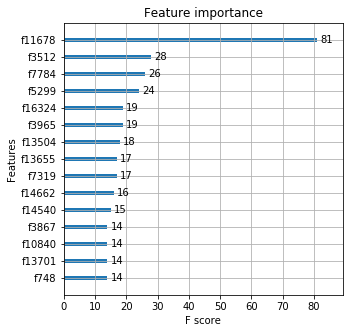

In [46]:
xgb.plot_importance(xgb_classifier, max_num_features=15)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

# Final models

In [77]:
final_nb = MultinomialNB(alpha=0.1)
final_nb.fit(tf_idf_train, y_train)

final_nb_pred = final_nb.predict(tf_idf_test)
print('Naive Bayes Accuracy Score: ',accuracy_score(y_test, final_nb_pred))
print('Naive Bayes Recall Score: ',recall_score(y_test, final_nb_pred))

Naive Bayes Accuracy Score:  0.856858846918489
Naive Bayes Recall Score:  0.25


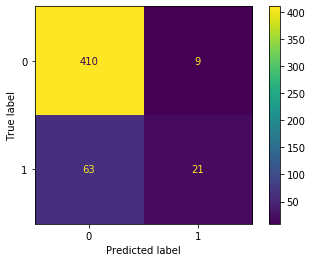

In [88]:
plot_confusion_matrix(final_nb, tf_idf_test, y_test)
plt.savefig('images/nb_confusion.png', dpi=200)

In [78]:
final_rf = RandomForestClassifier(criterion='gini', max_depth=1, max_features=1, max_leaf_nodes=2, n_estimators=20)
final_rf.fit(tf_idf_train, y_train)

final_rf_pred = final_rf.predict(tf_idf_test)
print('Random Forest Accuracy Score: ',accuracy_score(y_test, final_rf_pred))
print('Random Forest Recall Score: ',recall_score(y_test, final_rf_pred))

Random Forest Accuracy Score:  0.8330019880715706
Random Forest Recall Score:  0.0


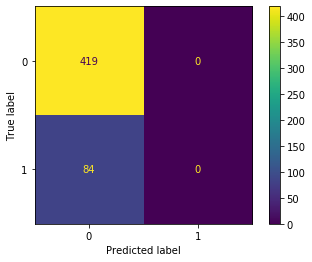

In [89]:
plot_confusion_matrix(final_rf, tf_idf_test, y_test)
plt.savefig('images/rf_confusion.png', dpi=200)

In [82]:
final_xgb = xgb.XGBClassifier(learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200)
final_xgb.fit(tf_idf_train, y_train)

final_xgb_pred = final_xgb.predict(tf_idf_test)
print('XGBoost Accuracy Score: ',accuracy_score(y_test, final_xgb_pred))
print('XGBoost Recall Score: ',recall_score(y_test, final_xgb_pred))

XGBoost Accuracy Score:  0.8886679920477137
XGBoost Recall Score:  0.6547619047619048


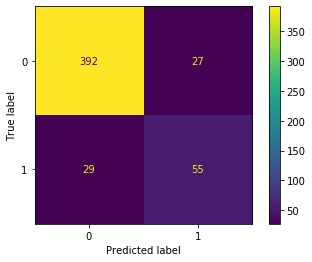

In [90]:
plot_confusion_matrix(final_xgb, tf_idf_test, y_test)
plt.savefig('images/xgb_confusion.png', dpi=200)

In [85]:
feat_importance = pd.DataFrame(final_rf.feature_importances_, index=tf.vocabulary)
feat_importance.sort_values(by=0,ascending=False).head(15)

,0
8909,0.05
15074,0.05
5805,0.05
12107,0.05
7709,0.05
12008,0.05
180,0.05
3980,0.05
12340,0.05
8956,0.05


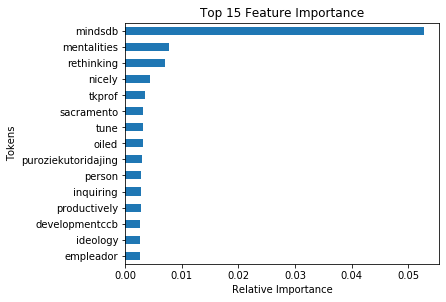

In [91]:
feat_importances_plt = pd.Series(rf_classifier.feature_importances_,index=tf.vocabulary_)
feat_importances_plt.nlargest(15).sort_values().plot(kind='barh')
plt.title("Top 15 Feature Importance")
plt.xlabel('Relative Importance')
plt.ylabel('Tokens')
# plt.show()

plt.tight_layout(pad=0)
plt.savefig('images/feat_imp.png', dpi=300)

# Linear SVC

then im finished with modeling

move onto eda (wordcloud and feature importance) any other kind of eda?